# **EDA on Retail dataset - Group 1**

### **Intern Details**
* **Name:** `Raj Aryan`
* **Contact:** `9102466098`
* **Email:** `theraaajj@gmail.com`

---

**Dataset Overview:**
This dataset is a snapshot of a fictional retail landscape, capturing essential attributes that
drive retail operations and customer interactions. It includes key details such as Transaction
ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total
Amount. These attributes enable a multifaceted exploration of sales trends, demographic
influences, and purchasing behaviours.

---


In [139]:
## dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv("/content/Group1_dataset.csv")
df.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [141]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [142]:
print(df['Transaction ID'].duplicated().any())
print(df['Customer ID'].duplicated().any())

False
False


>  No duplicate transactions and customers

In [143]:
print(df['Product Category'].value_counts())
print(df['Gender'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64


> We have 3 Product categories: Clothing(351), Electronics(342), Beauty(307)

> We have 2 Gender categories: Male(490), Female(510)

> We don't have an imbalanced dataset!!!!

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


> No null values in any rows.

In [145]:
df.shape

(1000, 9)

> We have 1000 rows, and 9 columns

In [146]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


> statistical analysis of our dataset

In [147]:
df['Date'] = pd.to_datetime(df['Date'])

> changing the date column to datetime, in order to extract the year, and months

Text(0.5, 1.0, 'Age Distribution')

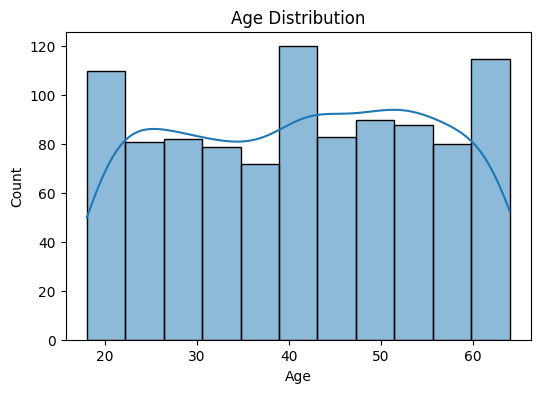

In [148]:
## Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Quantity Distribution')

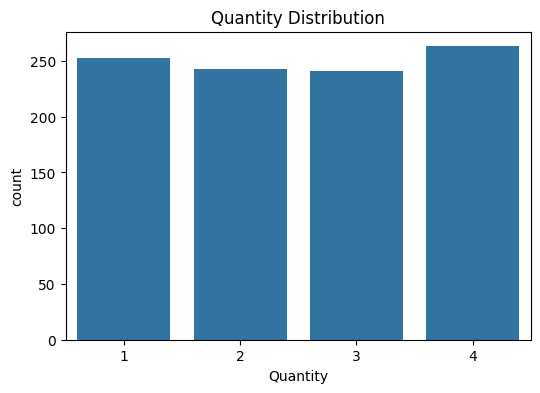

In [149]:
## Quantity distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Quantity', data=df)
plt.title("Quantity Distribution")

Text(0.5, 1.0, 'Gender Distribution')

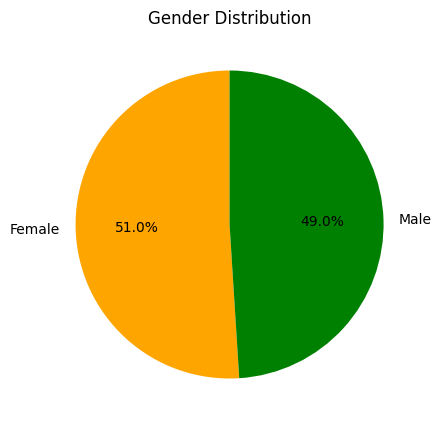

In [150]:
## Gender column
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange','green'])
plt.ylabel("")
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Product Category Distribution')

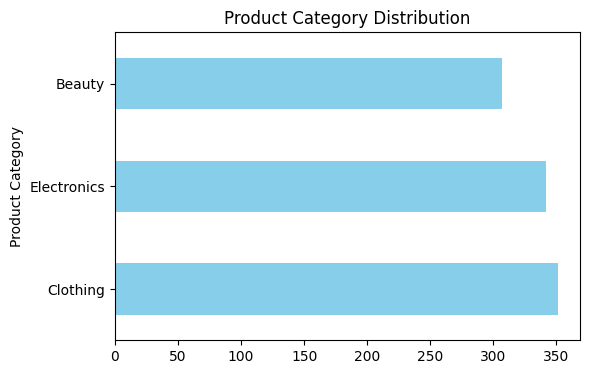

In [151]:
# Product Category columns
plt.figure(figsize=(6,4))
df['Product Category'].value_counts().plot(kind='barh', color='skyblue')
plt.title("Product Category Distribution")

Text(0, 0.5, 'Total Revenue')

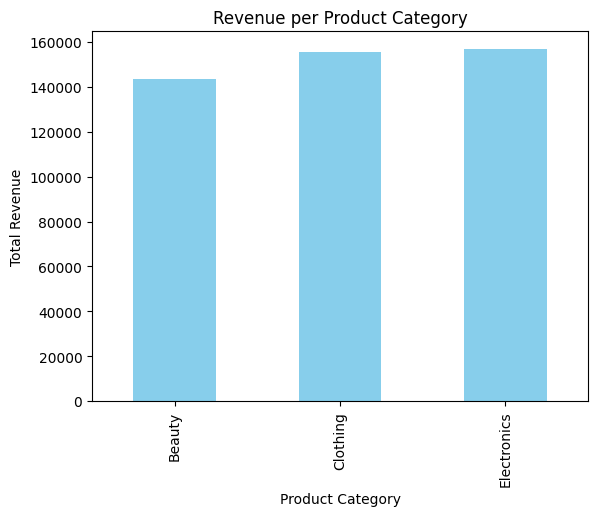

In [152]:
revenue_per_category = df.groupby('Product Category')['Total Amount'].sum()
revenue_per_category.plot(kind='bar', color='skyblue')
plt.title("Revenue per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

### Checking Outliers using IQR


In [153]:
def outliers_using_iqr(df, column):              # IQR method to find outliers.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [154]:
numerical_col = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in numerical_col:
    if col in df.columns:
        outliers, lower, upper = outliers_using_iqr(df, col)
        print(f"{col}: {len(outliers)} outliers found!!! (upper/lower bounds: {upper:.2f} - {lower:.2f})")

Age: 0 outliers found!!! (upper/lower bounds: 89.00 - -7.00)
Quantity: 0 outliers found!!! (upper/lower bounds: 8.50 - -3.50)
Price per Unit: 0 outliers found!!! (upper/lower bounds: 705.00 - -375.00)
Total Amount: 0 outliers found!!! (upper/lower bounds: 2160.00 - -1200.00)


### Producing new features: year, month, day, quarter

In [155]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['quarter'] = df['Date'].dt.quarter

In [156]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,2


### Producing Age categories a/c to different age groups
min age value = 18

max age value = 64

In [157]:
if 'Age' in df.columns:
    def categorize_age(age):
        if age <= 30:
            return 'Young'
        elif age <= 50:
            return 'Middle'
        else:
            return 'Old'

    df['Age_Category'] = df['Age'].apply(categorize_age)
    print("Added Age_Category column: Young, Middle, Old")

Added Age_Category column: Young, Middle, Old


In [158]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,quarter,Age_Category
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,4,Middle
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,1,Young
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,1,Middle
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,2,Middle
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,2,Young


In [159]:
# Age group distribution
print(f"\nAge Category Distribution:")
print(df['Age_Category'].value_counts())


Age Category Distribution:
Age_Category
Middle    414
Old       313
Young     273
Name: count, dtype: int64


In [160]:
df.head(15)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,quarter,Age_Category
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,4,Middle
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,1,Young
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,1,Middle
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,2,Middle
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,2,Young
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,2023,4,25,2,Middle
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,2023,3,13,1,Middle
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2023,2,22,1,Young
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,2023,12,13,4,Old
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,2023,10,7,4,Old


### Dropping unnecessary columns

In [161]:
columns_to_drop = ['Transaction ID']

df = df.drop(columns=columns_to_drop)
print(f"Remaining columns: {list(df.columns)}")

Remaining columns: ['Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount', 'year', 'month', 'day', 'quarter', 'Age_Category']


### seems like most of our datapoints are of txn in 2023

In [162]:
df.year.value_counts()

,count
year,
2023,998
2024,2


> only 2/1000 datapoints are from 2024, so it can be deleted.

In [163]:
df = df[df['year'] == 2023]
df.shape

(998, 13)

> Done!


### now we can also remove the year column

In [164]:
df = df.drop(columns = 'year')
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,day,quarter,Age_Category
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24,4,Middle
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27,1,Young
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13,1,Middle
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21,2,Middle
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6,2,Young


In [165]:
## Saving the cleaned dataset
df.to_csv('final_dataset.csv', index=False)

In [166]:
df.head(10)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,day,quarter,Age_Category
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24,4,Middle
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27,1,Young
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13,1,Middle
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21,2,Middle
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6,2,Young
5,2023-04-25,CUST006,Female,45,Beauty,1,30,30,4,25,2,Middle
6,2023-03-13,CUST007,Male,46,Clothing,2,25,50,3,13,1,Middle
7,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2,22,1,Young
8,2023-12-13,CUST009,Male,63,Electronics,2,300,600,12,13,4,Old
9,2023-10-07,CUST010,Female,52,Clothing,4,50,200,10,7,4,Old


### This is our final dataset that would be used to draw insights!

## **Ques. Which time periods (daily, weekly, monthly, seasonal) generate the highest revenue?**

#### Collective revenue on specific dates of month

/tmp/ipython-input-4019271224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='day', y='Total Amount', data=day_revenue, palette="viridis")


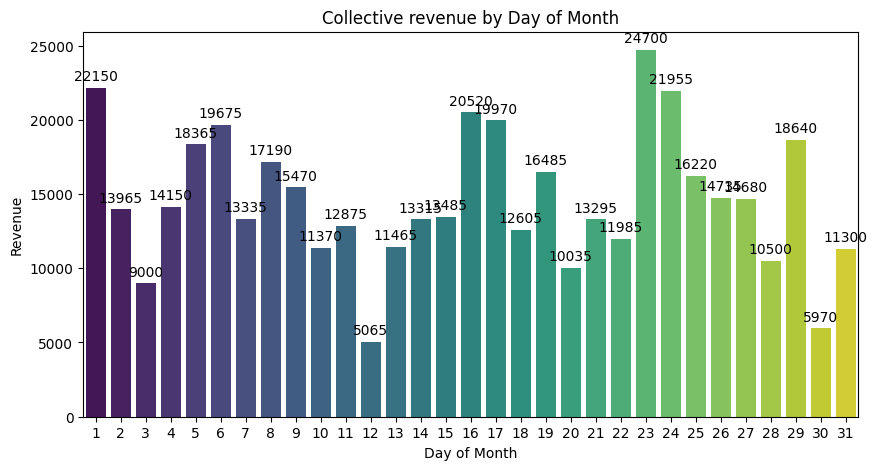

In [167]:
day_revenue = df.groupby('day')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,5))
bars = sns.barplot(x='day', y='Total Amount', data=day_revenue, palette="viridis")
plt.title("Collective revenue by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Revenue")
for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

Revenue on each day of the year

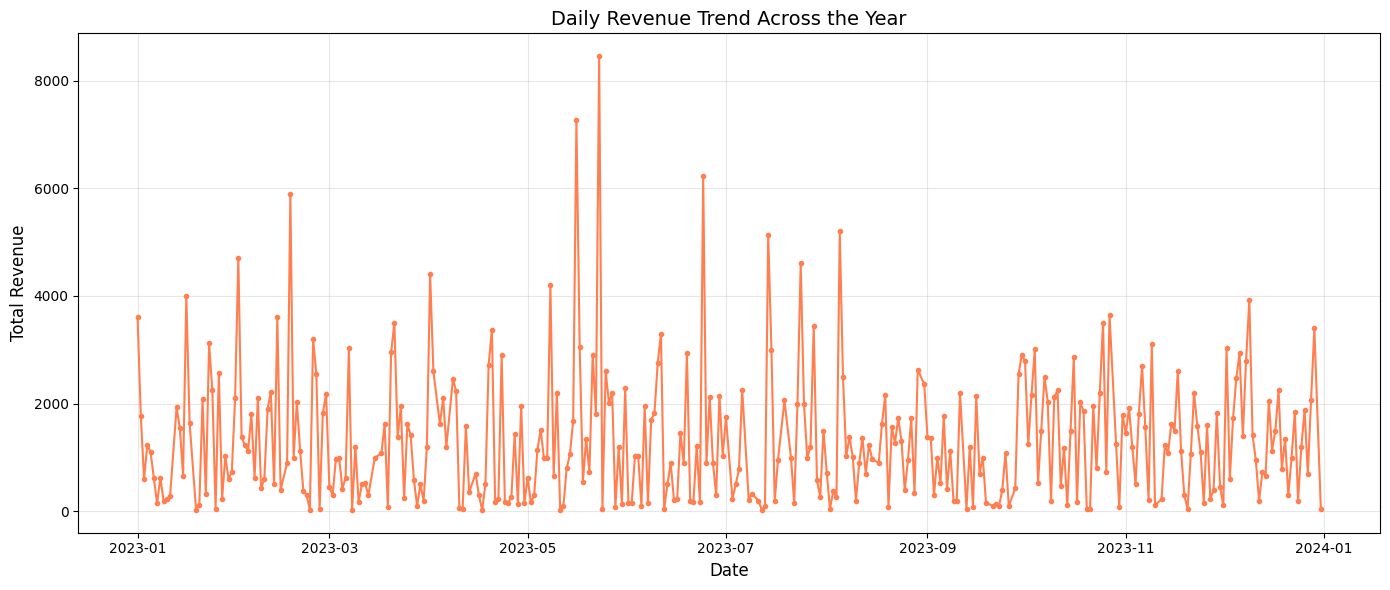

In [191]:
# group by date
daily_revenue = df.groupby("Date")["Total Amount"].sum().reset_index()

# plot
plt.figure(figsize=(14,6))
plt.plot(daily_revenue["Date"], daily_revenue["Total Amount"],
         marker=".", linestyle='-', color="coral")

plt.title("Daily Revenue Trend Across the Year", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

>> **Observation:** Maximum revenue collectively generates on 23rd of the months, followed by 1st and 24th day of the months.

#### Monthly Revenue

/tmp/ipython-input-20330171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars1 = sns.barplot(x='month', y='Total Amount', data=monthly_revenue, palette="viridis")


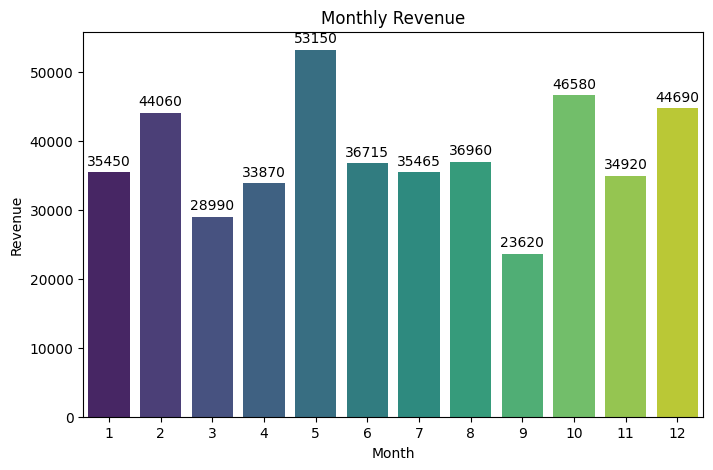

In [168]:
monthly_revenue = df.groupby('month')['Total Amount'].sum().reset_index()

plt.figure(figsize=(8,5))
bars1 = sns.barplot(x='month', y='Total Amount', data=monthly_revenue, palette="viridis")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

for container in bars1.containers:
    bars1.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()



>> **Observation:** Maximum revenue was generated in the month of May, followed by October, December, and February....

#### Seasonal/Quaterly Revenue

/tmp/ipython-input-1367856020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars3 = sns.barplot(x='quarter', y='Total Amount', data=quarterly_revenue, palette="viridis")


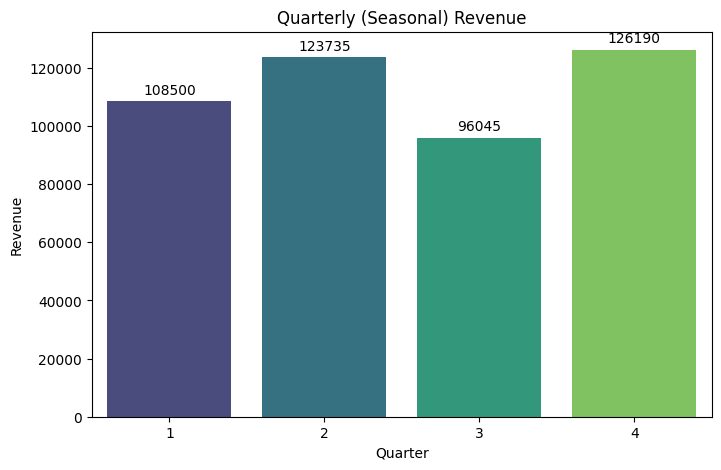

In [169]:
quarterly_revenue = df.groupby('quarter')['Total Amount'].sum().reset_index()

plt.figure(figsize=(8,5))
bars3 = sns.barplot(x='quarter', y='Total Amount', data=quarterly_revenue, palette="viridis")
plt.title("Quarterly (Seasonal) Revenue")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
for container in bars3.containers:
    bars3.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

>> **Observation:** As visible, the highest revenue was generated in the last quarter of the year, followed by the 2nd quarter, 1st quarter, and 3rd quarter respectively.

## **Ques: Which product categories contribute the most to total revenue, and which contribute the least?**

Revenue by Product Category:
 Product Category
Electronics    156875
Clothing       155580
Beauty         142015
Name: Total Amount, dtype: int64


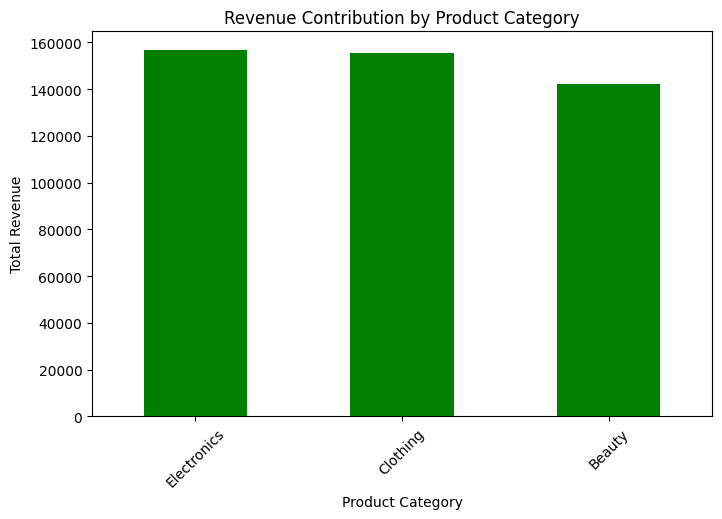

In [170]:
category_sales = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)
print("Revenue by Product Category:\n", category_sales)

plt.figure(figsize=(8,5))
category_sales.plot(kind="bar", color="green")
# bars4 = sns.barplot(x='Product Categroy', y='Total Amount', data=category_sales, palette="viridis")

plt.title("Revenue Contribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


>> **Observation:** Electronics contribute the most. Beauty contribute the least.

## **Ques: What is the distribution of high-ticket vs low-ticket sales?**

In [171]:
print(f'Minimum Product price per unit: {df["Price per Unit"].min()}')
print(f'Maximum Product price per unit: {df["Price per Unit"].max()}')

df['Price per Unit'].value_counts()

Minimum Product price per unit: 25
Maximum Product price per unit: 500


,count
Price per Unit,
50,211
25,210
500,198
300,197
30,182


>> **Observation:** We have 5 different prices per unit of product, 25, 30, 50, 300 and 500. From this we can consider 25, 30, 50 priced products as low-ticket sales, and the 300, 500 priced products as high-ticket sales.

ticket_type
Low Ticket     603
High Ticket    395
Name: count, dtype: int64


/tmp/ipython-input-1203426225.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_counts.index, y=ticket_counts.values, palette="viridis")


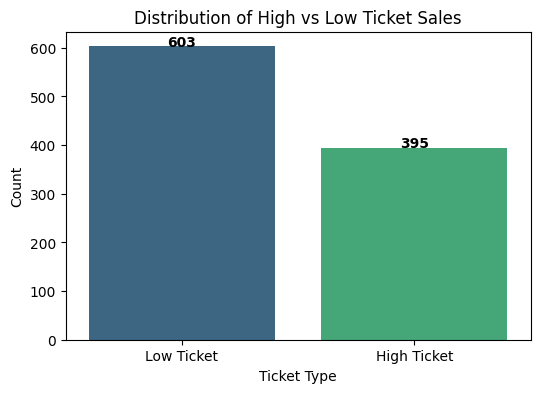

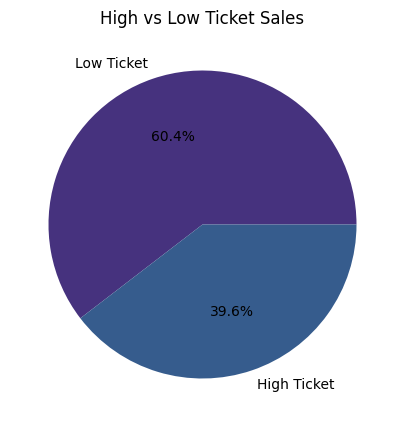

In [172]:
df["ticket_type"] = df["Price per Unit"].apply(
    lambda x: "High Ticket" if x in [300, 500] else "Low Ticket"
)

# Count distribution
ticket_counts = df["ticket_type"].value_counts()

print(ticket_counts)

# Visualization - Bar Plot
plt.figure(figsize=(6,4))
sns.barplot(x=ticket_counts.index, y=ticket_counts.values, palette="viridis")

# Add counts on top of bars
for i, v in enumerate(ticket_counts.values):
    plt.text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.title("Distribution of High vs Low Ticket Sales")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,5))
plt.pie(ticket_counts.values, labels=ticket_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("High vs Low Ticket Sales")
plt.show()


>> **Observations:** From the above visualizations, we can see the distribution of High ticket sales, which is around `60%` of the total sales, and the Low ticket sales, which is around `40%` of the total sales.

## **Ques. What's the average revenue per customer, and how does it vary across age group??**

## **Ques. Can we segmetn customers into groups (eg: young-budget, midage-premium, seniors) based on their spending habits?**

In [173]:
avg_rev_per_cust = df["Total Amount"].mean()
print("Average revenue per customer:\n", round(avg_rev_per_cust,2))

Average revenue per customer:
 455.38


>> **Observation:** The average revenue per customer comes out to be `455.38`, but this is highly based, based on the huge difference between `high tickets` and `low tickets`

Average revenue by Age Category:
 Age_Category
Young     486.978022
Middle    455.799031
Old       427.179487
Name: Total Amount, dtype: float64


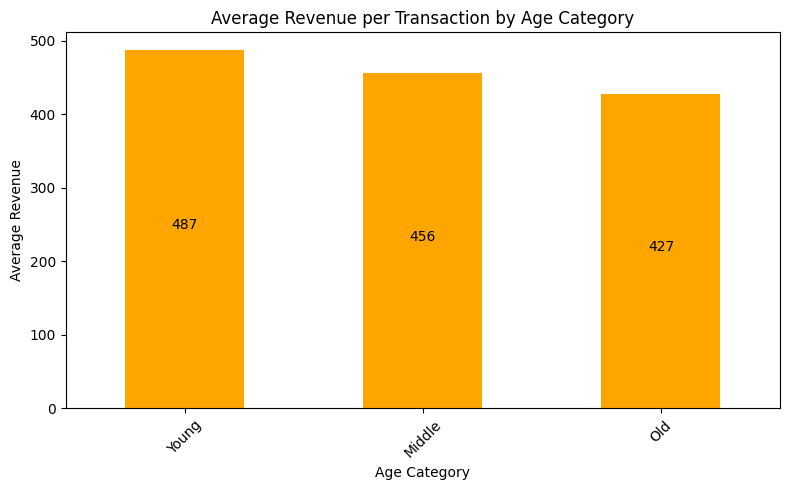

In [174]:
age_category_avg = df.groupby("Age_Category")["Total Amount"].mean().sort_values(ascending=False)

print("Average revenue by Age Category:\n", age_category_avg)

plt.figure(figsize=(8,5))
ax = age_category_avg.plot(kind="bar", color="orange")
ax.bar_label(ax.containers[0], fmt="%.0f", label_type="center", padding=3)

plt.title("Average Revenue per Transaction by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>> **Observation 1:** The younger age group `18-30` tends to spend most per transaction, and the older age group tends to spend the least comparetively, while the middle age people are at a moderate scale.

>> **Observation 2:** We can segment like:
 ,  

*   young age customers = `young-premium`
*   middle age customers = `mid-age-budget`
*   old age customers = `old-low-budget`

# **Customer Segmentation**

## **Ques. Which age group has the highest repeat purchase frequency?**

In [175]:
## counting transactions per customer
freq_per_customer = df.groupby(['Customer ID', 'Age_Category']).size().reset_index(name='Quantity')

## average purchase count per age group
avg_freq_per_age = freq_per_customer.groupby('Age_Category')['Quantity'].mean()
print(avg_freq_per_age)

Age_Category
Middle    1.0
Old       1.0
Young     1.0
Name: Quantity, dtype: float64


>> **Observation:** We can see that the repeat frequency is 1 for all age groups, and that's because our dataset has all unique customers, and unique transactions.

## **Ques. Do male and female customers differ in terms of basket size (average number of items purchased)?**

In [176]:
avg_items_gender = df.groupby('Gender')['Quantity'].mean()
print(avg_items_gender)

Gender
Female    2.545098
Male      2.483607
Name: Quantity, dtype: float64


>> **Observation:** Males and females do differ based on the basket size, but not significantly. There's a very little difference

Total spending by gender:
 Gender
Female    232840
Male      221630
Name: Total Amount, dtype: int64


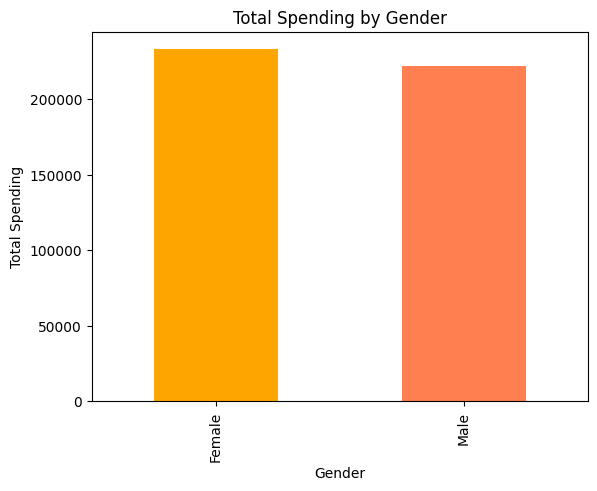

In [177]:
gender_spending = df.groupby("Gender")["Total Amount"].sum()
print("Total spending by gender:\n", gender_spending)


gender_spending.plot(kind="bar", color=["orange", "coral"])
plt.title("Total Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Spending")
plt.show()

>> **Observation 2:** Females tend to spend more, compared to Males

# **Product Insights**

## **Ques.  Are certain product categories more popular among younger vs. older customers?**

For young age group customers:

Average revenue per product category for Young age group:

Product Category
Clothing       553.068182
Beauty         471.237113
Electronics    438.238636
Name: Total Amount, dtype: float64


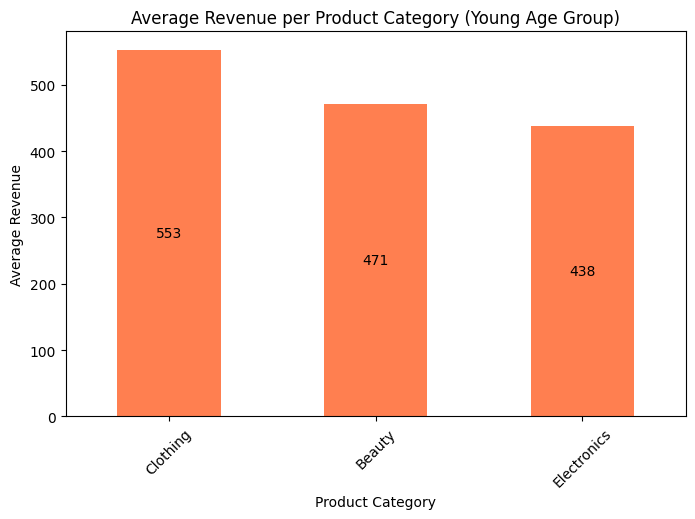

In [178]:
young_avg = (
    df[df["Age_Category"] == "Young"]
    .groupby("Product Category")["Total Amount"]
    .mean()
    .sort_values(ascending=False)
)

print("Average revenue per product category for Young age group:\n")
print(young_avg)

plt.figure(figsize=(8,5))
ax1 = young_avg.plot(kind="bar", color="coral")
ax1.bar_label(ax1.containers[0], fmt="%.0f", label_type="center")

plt.title("Average Revenue per Product Category (Young Age Group)")
plt.xlabel("Product Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()


>> People of the young age group tends to spend more on clothing, then beauty, and the least on electronics


For middle age group customers:

Average revenue per product category for Middle age group:

Product Category
Beauty         532.396694
Electronics    443.908451
Clothing       405.266667
Name: Total Amount, dtype: float64


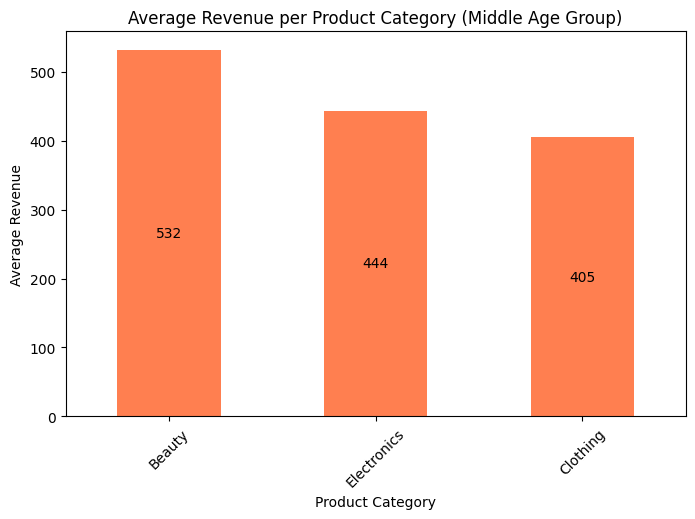

In [179]:
middle_avg = (
    df[df["Age_Category"] == "Middle"]
    .groupby("Product Category")["Total Amount"]
    .mean()
    .sort_values(ascending=False)
)

print("Average revenue per product category for Middle age group:\n")
print(middle_avg)

plt.figure(figsize=(8,5))
ax2 = middle_avg.plot(kind="bar", color="coral")
ax2.bar_label(ax2.containers[0], fmt="%.0f", label_type="center")

plt.title("Average Revenue per Product Category (Middle Age Group)")
plt.xlabel("Product Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()


>> People of the middle age group tends to spend more on beauty, then electronics, and the least on clothing

For old age group customers:

Average revenue per product category for Old age group:

Product Category
Electronics    497.972973
Clothing       408.141593
Beauty         362.329545
Name: Total Amount, dtype: float64


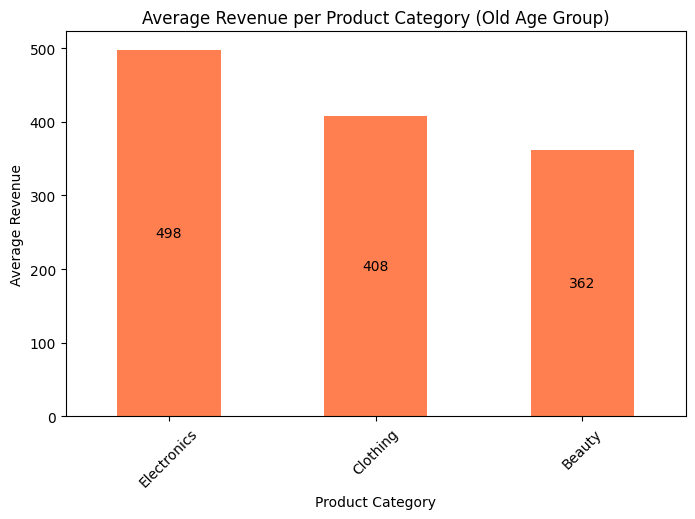

In [180]:
Old_avg = (
    df[df["Age_Category"] == "Old"]
    .groupby("Product Category")["Total Amount"]
    .mean()
    .sort_values(ascending=False)
)

print("Average revenue per product category for Old age group:\n")
print(Old_avg)

plt.figure(figsize=(8,5))
ax3 = Old_avg.plot(kind="bar", color="coral")
ax3.bar_label(ax3.containers[0], fmt="%.0f", label_type="center")

plt.title("Average Revenue per Product Category (Old Age Group)")
plt.xlabel("Product Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()


>> People of the middle age group tends to spend most on electronics, then clothing, and the least on beauty

## **Ques.  Who are the top 5% of customers contributing to revenue (Pareto Principle / 80-20 rule)?**


In [181]:
# customer_spending = df.groupby("Customer ID")["Total Amount"].sum()
# top_5_percent_threshold = customer_spending.quantile(0.95)

# top_5_percent_customers = customer_spending[customer_spending >= top_5_percent_threshold]

# print("Top 5% customers by spending:\n")
# print(top_5_percent_customers.sort_values(ascending=False))


# Get total spending per customer
customer_spending = df.groupby("Customer ID")["Total Amount"].sum()

# Find top 5% threshold
top_5_percent_threshold = customer_spending.quantile(0.95)

# Get top 5% customers
top_5_percent_customers = customer_spending[customer_spending >= top_5_percent_threshold]

print("Top 5% customers by spending:\n")
print(top_5_percent_customers.sort_values(ascending=False))

# Calculate their contribution to total revenue (Pareto Analysis)
total_revenue = customer_spending.sum()
top_5_percent_revenue = top_5_percent_customers.sum()
contribution_percentage = (top_5_percent_revenue / total_revenue) * 100

print(f"\nPareto Analysis:")
print(f"Number of top 5% customers: {len(top_5_percent_customers)}")
print(f"Total customers: {len(customer_spending)}")
print(f"Revenue from top 5% customers: ${top_5_percent_revenue:,.2f}")
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Top 5% customers contribute {contribution_percentage:.1f}% of total revenue")

Top 5% customers by spending:

Customer ID
CUST015    2000
CUST065    2000
CUST139    2000
CUST089    2000
CUST074    2000
           ... 
CUST805    1500
CUST859    1500
CUST869    1500
CUST942    1500
CUST956    1500
Name: Total Amount, Length: 98, dtype: int64

Pareto Analysis:
Number of top 5% customers: 98
Total customers: 998
Revenue from top 5% customers: $171,500.00
Total revenue: $454,470.00
Top 5% customers contribute 37.7% of total revenue


Customer Tier Analysis:
              Customer_Count  Total_Revenue  Avg_Spending  Revenue_Percentage
Total Amount                                                                 
Bottom 50%               499          34370     68.877756                 7.6
Top 20%                  103         113800   1104.854369                25.0
Top 5%                    98         171500   1750.000000                37.7
Top 50%                  298         134800    452.348993                29.7


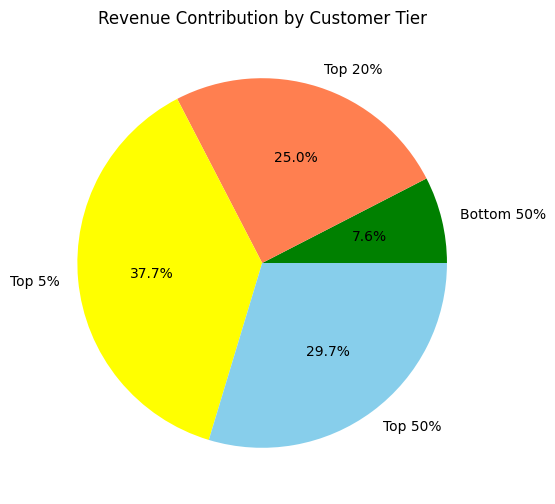

In [182]:
# top_5_percent_customers.sort_values(ascending=False).plot(kind="bar", figsize=(20,8), color="green")
# plt.title("Top 5% Customers by Spending")
# plt.xlabel("Customer ID")
# plt.ylabel("Total Spending")
# plt.xticks(rotation=45)
# plt.show()

# Sort all customers by spending
# customer_spending_sorted = customer_spending.sort_values(ascending=False)
# cumulative_revenue = customer_spending_sorted.cumsum()
# cumulative_percentage = (cumulative_revenue / total_revenue) * 100

# plt.figure(figsize=(12, 6))
# plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, 'b-', linewidth=2)
# plt.axhline(y=80, color='r', linestyle='--', label='80% of Revenue')
# plt.axvline(x=len(top_5_percent_customers), color='g', linestyle='--', label=f'Top 5% Customers ({len(top_5_percent_customers)} customers)')
# plt.xlabel('Number of Customers (ranked by spending)')
# plt.ylabel('Cumulative Revenue Percentage')
# plt.title('Pareto Analysis: Customer Revenue Contribution')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

# Create spending tiers
def categorize_customer(spending):
    if spending >= customer_spending.quantile(0.95):
        return 'Top 5%'
    elif spending >= customer_spending.quantile(0.80):
        return 'Top 20%'
    elif spending >= customer_spending.quantile(0.50):
        return 'Top 50%'
    else:
        return 'Bottom 50%'

customer_tiers = customer_spending.apply(categorize_customer)
tier_summary = pd.DataFrame({
    'Customer_Count': customer_tiers.value_counts(),
    'Total_Revenue': customer_spending.groupby(customer_tiers).sum(),
    'Avg_Spending': customer_spending.groupby(customer_tiers).mean()
})
tier_summary['Revenue_Percentage'] = (tier_summary['Total_Revenue'] / total_revenue * 100).round(1)

print("Customer Tier Analysis:")
print(tier_summary)

# Pie chart of revenue contribution
plt.figure(figsize=(10, 6))
plt.pie(tier_summary['Total_Revenue'], labels=tier_summary.index, autopct='%1.1f%%',
        colors=['green', 'coral', 'yellow', 'skyblue'])
plt.title('Revenue Contribution by Customer Tier')
plt.show()


In [183]:
df.head(10)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,day,quarter,Age_Category,ticket_type
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24,4,Middle,Low Ticket
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27,1,Young,High Ticket
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13,1,Middle,Low Ticket
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21,2,Middle,High Ticket
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6,2,Young,Low Ticket
5,2023-04-25,CUST006,Female,45,Beauty,1,30,30,4,25,2,Middle,Low Ticket
6,2023-03-13,CUST007,Male,46,Clothing,2,25,50,3,13,1,Middle,Low Ticket
7,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2,22,1,Young,Low Ticket
8,2023-12-13,CUST009,Male,63,Electronics,2,300,600,12,13,4,Old,High Ticket
9,2023-10-07,CUST010,Female,52,Clothing,4,50,200,10,7,4,Old,Low Ticket


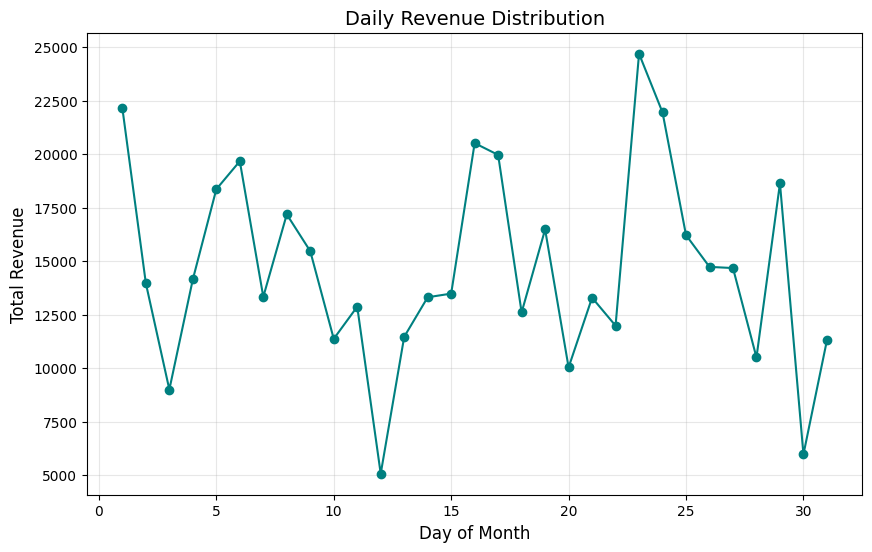

In [184]:


# Example dataframe (replace with yours)
# df = pd.read_csv("retail.csv")

# Group by day to get total revenue
daily_revenue = df.groupby("day")["Total Amount"].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(daily_revenue["day"], daily_revenue["Total Amount"],
         marker="o", linestyle="-", color="teal")

plt.title("Daily Revenue Distribution", fontsize=14)
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


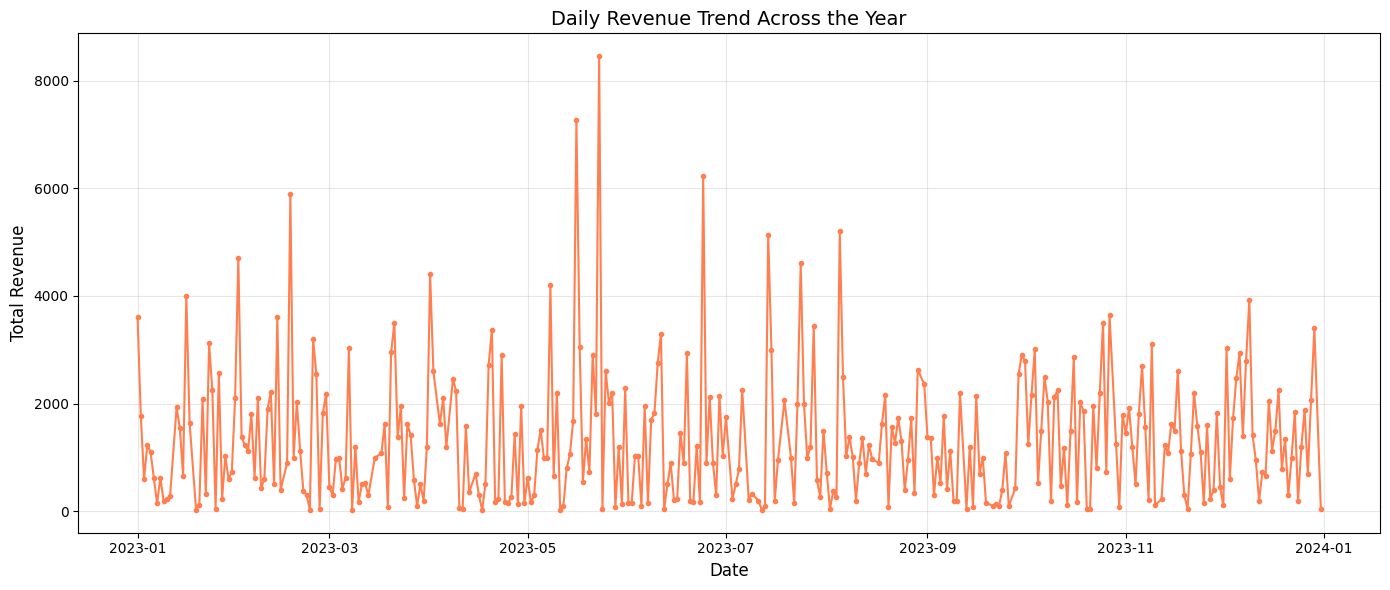